In [1]:
import pandas as pd

In [48]:
import descartes
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
%matplotlib inline
import adjustText as aT
import geocoder

In [3]:
from missing_columns_pd import miss_cols

In [4]:
census_combined4 = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\census data\census_combined4.csv',dtype={'Zip_Code':str},index_col=0)

In [5]:
census_combined4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934 entries, 0 to 933
Data columns (total 82 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Zip_Code                                                      934 non-null    object 
 1   pct_Married-couple_household                                  934 non-null    float64
 2   pct_High_school_graduate_or_higher                            934 non-null    float64
 3   pct_Bachelors_degree_or_higher                                934 non-null    float64
 4   Total_population                                              934 non-null    float64
 5   Male                                                          934 non-null    float64
 6   Female                                                        934 non-null    float64
 7   Sex_ratio_(males_per_100_females)                             934 non-n

In [6]:
iowa_census_zip = census_combined4[['Zip_Code','Total_population','25_to_34_years','population_growth','population_per_store_None','Median_age_(years)','population_density','Median_household_income_(dollars)','number_of_stores','population_per_store_imputed','county','population_density']]

In [7]:
# scott

census_combined4['county'].head()

0      Warren County
1       Adair County
2      Dallas County
3    Marshall County
4      Hardin County
Name: county, dtype: object

In [8]:
# pop_per_zip_df = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\census data\pop_per_zip_df.csv', dtype={'Zip_Code':str}, index_col=0)

In [9]:
# pop_per_zip_df.head()

In [10]:
# !pip install mapclassify

read in us shape file

In [11]:

us = gpd.read_file(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\census data\tl_2020_us_zcta520.shp')

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


In [12]:
pd.set_option('display.max_columns', None)
us.head()

,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,35592,35592,B5,G6350,S,298552385,235989,+33.7427261,-088.0973903,"POLYGON ((-88.24735 33.65390, -88.24713 33.654..."
1,35616,35616,B5,G6350,S,559506992,41870756,+34.7395036,-088.0193814,"POLYGON ((-88.13997 34.58184, -88.13995 34.582..."
2,35621,35621,B5,G6350,S,117838488,409438,+34.3350314,-086.7270557,"POLYGON ((-86.81659 34.34960, -86.81649 34.349..."
3,35651,35651,B5,G6350,S,104521045,574316,+34.4609087,-087.4801507,"POLYGON ((-87.53087 34.42492, -87.53082 34.429..."
4,36010,36010,B5,G6350,S,335675180,236811,+31.6598950,-085.8128958,"POLYGON ((-85.95712 31.67744, -85.95676 31.677..."


In [13]:
us.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33791 entries, 0 to 33790
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ZCTA5CE20   33791 non-null  object  
 1   GEOID20     33791 non-null  object  
 2   CLASSFP20   33791 non-null  object  
 3   MTFCC20     33791 non-null  object  
 4   FUNCSTAT20  33791 non-null  object  
 5   ALAND20     33791 non-null  int64   
 6   AWATER20    33791 non-null  int64   
 7   INTPTLAT20  33791 non-null  object  
 8   INTPTLON20  33791 non-null  object  
 9   geometry    33791 non-null  geometry
dtypes: geometry(1), int64(2), object(7)
memory usage: 2.6+ MB


In [14]:
type(us)

geopandas.geodataframe.GeoDataFrame

merge US census shape file with pop_per_zip_df

Note:  to create a geodataframe, the geodataframe must be on the left of the merge

In [15]:
iowa_pop_gdf = us.merge(iowa_census_zip,how='inner',left_on='ZCTA5CE20', right_on='Zip_Code')

In [16]:
type(iowa_pop_gdf)

geopandas.geodataframe.GeoDataFrame

In [17]:
# polk
polk_gdf = iowa_pop_gdf.loc[iowa_pop_gdf.county == 'Polk County']

In [18]:
polk_gdf['population_density'] = round(polk_gdf.population_density)

C:\Users\dgarb\AppData\Local\Temp/ipykernel_10328/1067307264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polk_gdf['population_density'] = round(polk_gdf.population_density)


In [19]:
polk_gdf.head()

,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry,Zip_Code,Total_population,25_to_34_years,population_growth,population_per_store_None,Median_age_(years),population_density,Median_household_income_(dollars),number_of_stores,population_per_store_imputed,county,population_density
12,50009,50009,B5,G6350,S,72291151,83517,+41.6434234,-093.4597029,"POLYGON ((-93.53621 41.67311, -93.53511 41.673...",50009,20033.0,2574.0,1.140766,1252.062500,37.5,718.0,80740.0,16.0,1252.062500,Polk County,718.0
54,50131,50131,B5,G6350,S,61357399,10946625,+41.6967565,-093.7208081,"POLYGON ((-93.76559 41.66640, -93.76559 41.666...",50131,21907.0,2833.0,1.112256,1991.545455,38.5,925.0,89625.0,11.0,1991.545455,Polk County,925.0
57,50226,50226,B5,G6350,S,94150973,11193314,+41.7962430,-093.7019735,"POLYGON ((-93.78843 41.82040, -93.78800 41.820...",50226,7197.0,832.0,1.275159,1799.250000,36.0,198.0,126708.0,4.0,1799.250000,Polk County,198.0
59,50313,50313,B5,G6350,S,46751777,1937804,+41.6568953,-093.6245401,"POLYGON ((-93.68094 41.69354, -93.68031 41.693...",50313,19306.0,3002.0,1.083754,1485.076923,37.2,1070.0,54387.0,13.0,1485.076923,Polk County,1070.0
91,50023,50023,B5,G6350,S,54318103,1661310,+41.7263851,-093.6305058,"POLYGON ((-93.69143 41.72792, -93.68811 41.730...",50023,40518.0,6873.0,1.319805,2894.142857,32.3,1932.0,91974.0,14.0,2894.142857,Polk County,1932.0


In [20]:
# ax = polk_gdf.plot(column='population_density',legend = True, figsize=(15, 10),
#                       )
# ax.set_axis_off(); # turns off axis labels

# Polk County

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


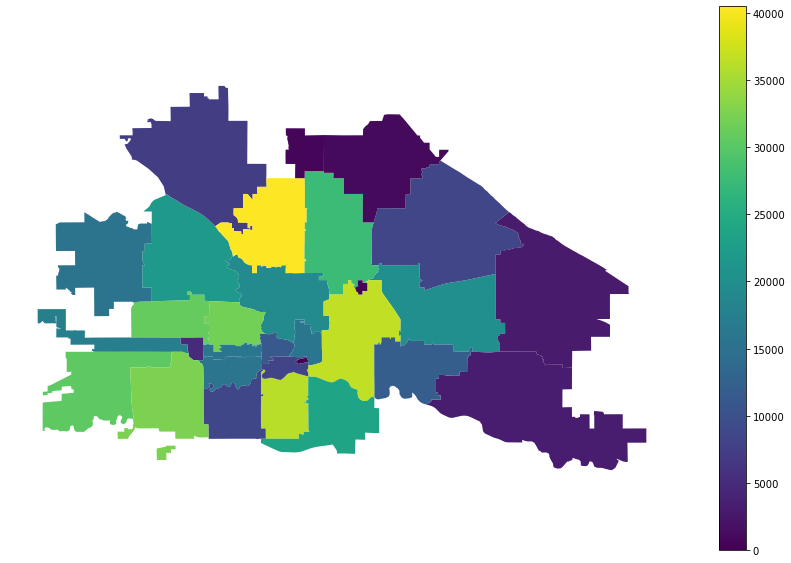

In [21]:
ax = polk_gdf.plot(column='Total_population',legend = True, figsize=(15, 10),
                      )
ax.set_axis_off(); # turns off axis labels

# Linn County

In [22]:
linn_gdf = iowa_pop_gdf.loc[iowa_pop_gdf.county == 'Linn County']

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


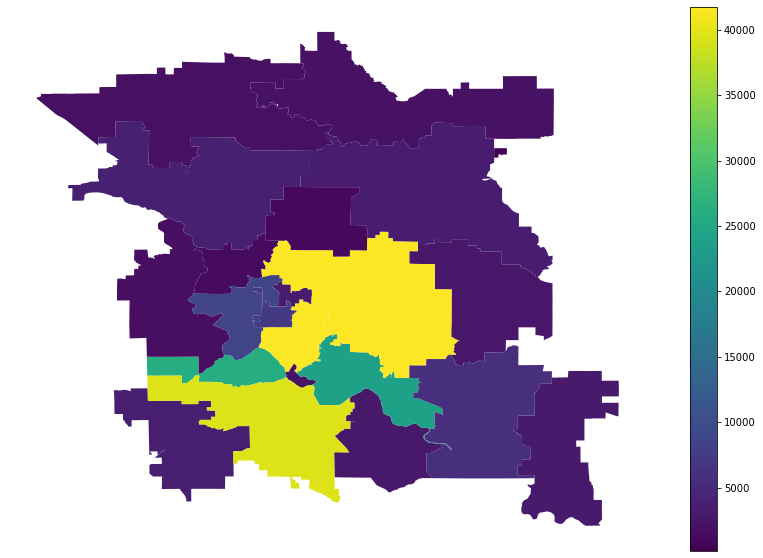

In [45]:
ax = linn_gdf.plot(column='Total_population',legend = True, figsize=(15, 10),
                      )
ax.set_axis_off(); # turns off axis labels

# Scott County

In [23]:
# scott
scott_gdf = iowa_pop_gdf.loc[iowa_pop_gdf.county == 'Scott County']

In [24]:
type(scott_gdf)

geopandas.geodataframe.GeoDataFrame

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


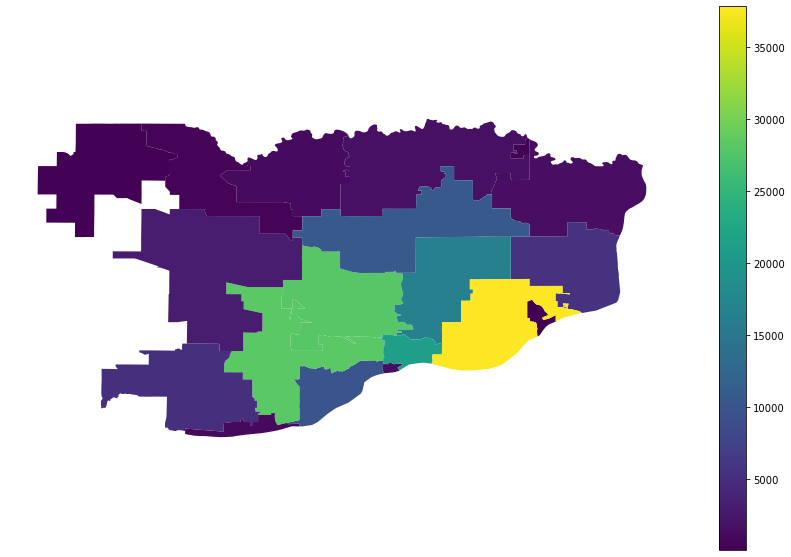

In [25]:
ax = scott_gdf.plot(column='Total_population',legend = True, figsize=(15, 10),
                      )
ax.set_axis_off(); # turns off axis labels

# Johnson

In [ ]:
ax = za.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
texts = []

for x, y, label in zip(za_points.geometry.x, za_points.geometry.y, za_points["name"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
               arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))

In [46]:
# Johnson
johnson_gdf = iowa_pop_gdf.loc[iowa_pop_gdf.county == 'Johnson County']

In [49]:
za = johnson_gdf[['Zip_Code','geometry','Total_population']]

za["center"] = za["geometry"].centroid
za_points = za.copy()
za_points.set_geometry("center", inplace = True)

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\array.py:524: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return _unary_geo("centroid", self)
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\geoseries.py:133: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = from_shapely(s.values)
C:\Users\dgarb\AppData\Local\Temp/ipykernel_10328/1901143237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  za["center"] = za["geometry"].centroid


C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


1

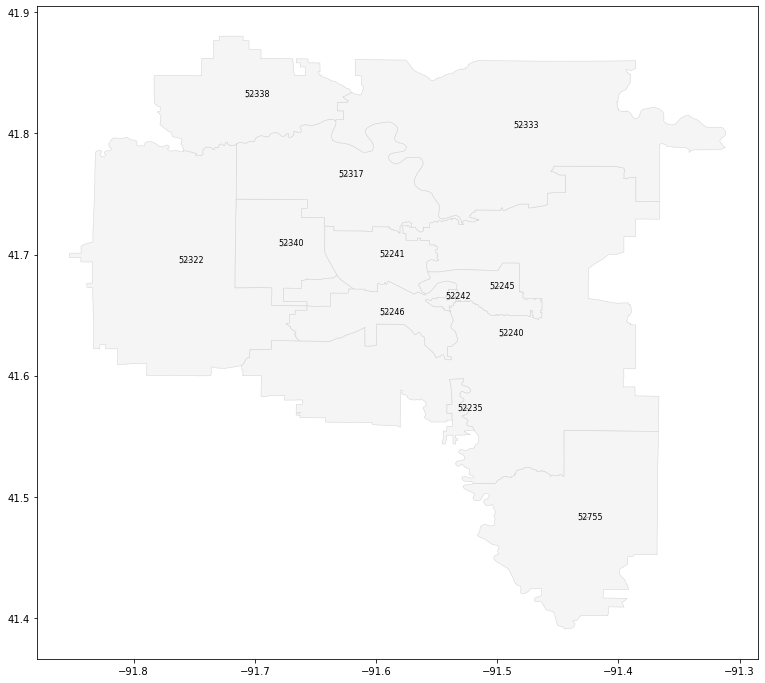

In [51]:
ax = za.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
texts = []

for x, y, label in zip(za_points.geometry.x, za_points.geometry.y, za_points["Zip_Code"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
               arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))

# 52245

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


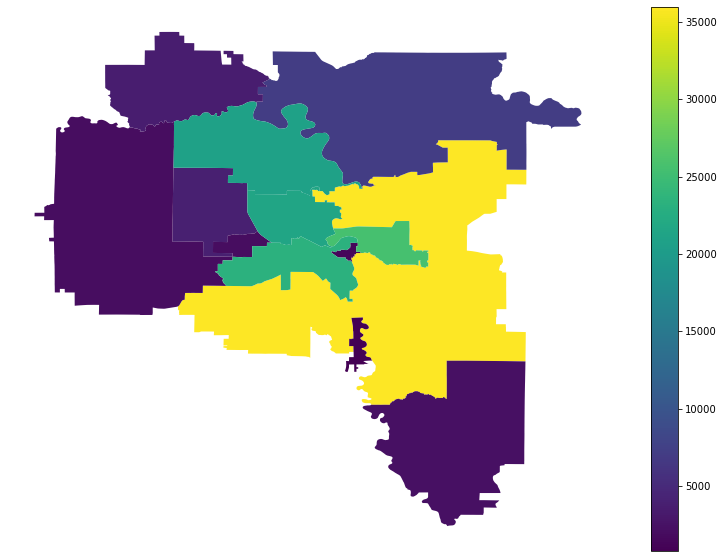

In [47]:
# Johnson
ax = za.plot(column='Total_population',legend = True, figsize=(15, 10),
                      )
ax.set_axis_off(); # turns off axis labels

# Dubuque County

In [26]:
# Dubuque
Dubuque = iowa_pop_gdf.loc[iowa_pop_gdf.county == 'Dubuque County']

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


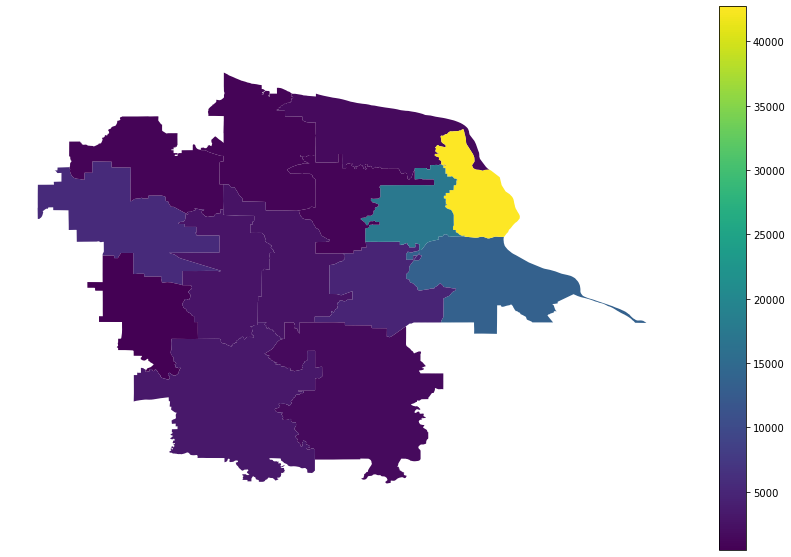

In [27]:
# Dubuque
ax = Dubuque.plot(column='Total_population',legend = True, figsize=(15, 10),
                      )
ax.set_axis_off(); # turns off axis labels

In [28]:
iowa_pop_gdf.shape

(934, 22)

In [29]:
iowa_pop_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 934 entries, 0 to 933
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   ZCTA5CE20                          934 non-null    object  
 1   GEOID20                            934 non-null    object  
 2   CLASSFP20                          934 non-null    object  
 3   MTFCC20                            934 non-null    object  
 4   FUNCSTAT20                         934 non-null    object  
 5   ALAND20                            934 non-null    int64   
 6   AWATER20                           934 non-null    int64   
 7   INTPTLAT20                         934 non-null    object  
 8   INTPTLON20                         934 non-null    object  
 9   geometry                           934 non-null    geometry
 10  Zip_Code                           934 non-null    object  
 11  Total_population                   93

In [30]:
land_area_census = iowa_pop_gdf[['Zip_Code','ZCTA5CE20','ALAND20']]

In [31]:
land_area_census.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\census data\land_area_census.csv')

In [32]:
type(land_area_census)

pandas.core.frame.DataFrame

In [33]:

iowa_pop_gdf.head()

,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry,Zip_Code,Total_population,25_to_34_years,population_growth,population_per_store_None,Median_age_(years),population_density,Median_household_income_(dollars),number_of_stores,population_per_store_imputed,county,population_density
0,51640,51640,B5,G6350,S,298913924,4033670,+40.6262178,-095.6613422,"POLYGON ((-95.77470 40.57357, -95.77355 40.578...",51640,1660.0,163.0,1.066838,1660.0,46.0,14.383339,46964.0,1.0,1660.0,Fremont County,14.383339
1,52626,52626,B5,G6350,S,228312761,3985774,+40.6374551,-091.7255911,"POLYGON ((-91.86403 40.57529, -91.86398 40.575...",52626,1264.0,91.0,0.866941,1264.0,43.6,14.338861,42750.0,1.0,1264.0,Van Buren County,14.338861
2,52542,52542,B5,G6350,S,121264799,151574,+40.6198504,-092.0562370,"POLYGON ((-92.15051 40.60549, -92.15050 40.608...",52542,298.0,63.0,0.577519,NaN,28.3,6.364720,42708.0,0.0,298.0,Van Buren County,6.364720
3,52573,52573,B5,G6350,S,96683363,1381599,+40.6275690,-091.9288495,"POLYGON ((-92.02973 40.66824, -92.02972 40.671...",52573,193.0,22.0,1.507812,NaN,52.3,5.170152,0.0,0.0,193.0,Van Buren County,5.170152
4,51557,51557,B5,G6350,S,194969173,1901656,+41.7336445,-096.0063653,"POLYGON ((-96.13606 41.74169, -96.13438 41.741...",51557,828.0,53.0,1.108434,NaN,53.7,10.999227,72292.0,0.0,828.0,Harrison County,10.999227


# map of population

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


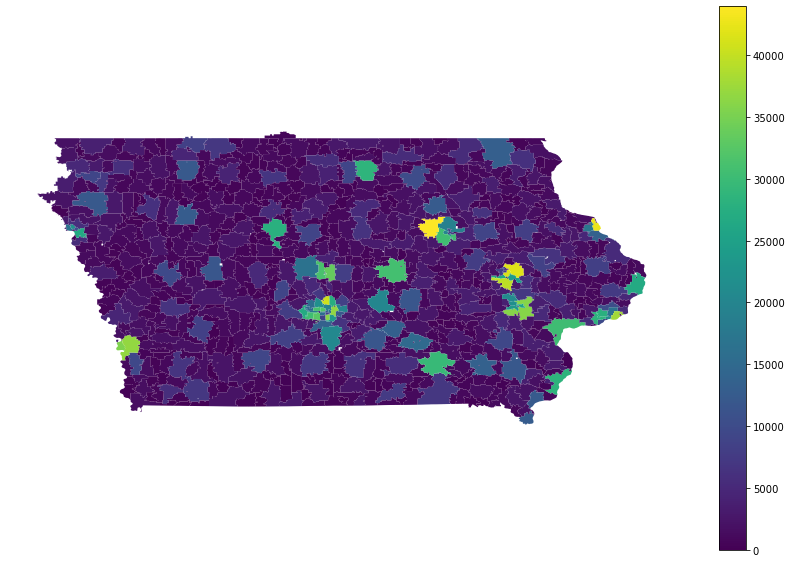

In [34]:
ax = iowa_pop_gdf.plot(column='Total_population',legend = True, figsize=(15, 10),
                      )
ax.set_axis_off(); # turns off axis labels

### map of population_per_store_None

In [35]:
type(iowa_pop_gdf['population_per_store_None'][2])

numpy.float64

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


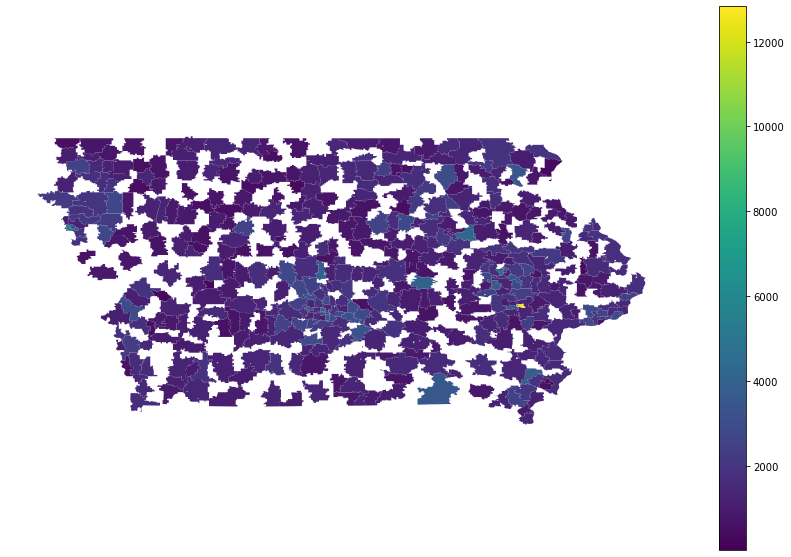

In [36]:


# ax = iowa_pop_gdf.plot(column='population_per_store_None', missing_kwds={'color': 'lightgrey'},legend = True, figsize=(15, 10)) 
                        
ax = iowa_pop_gdf.plot(column='population_per_store_None',legend = True, figsize=(15, 10))                       
ax.set_axis_off(); # turns off axis labels

### map of population_per_store_imputed (impute with the population of the zip code)

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


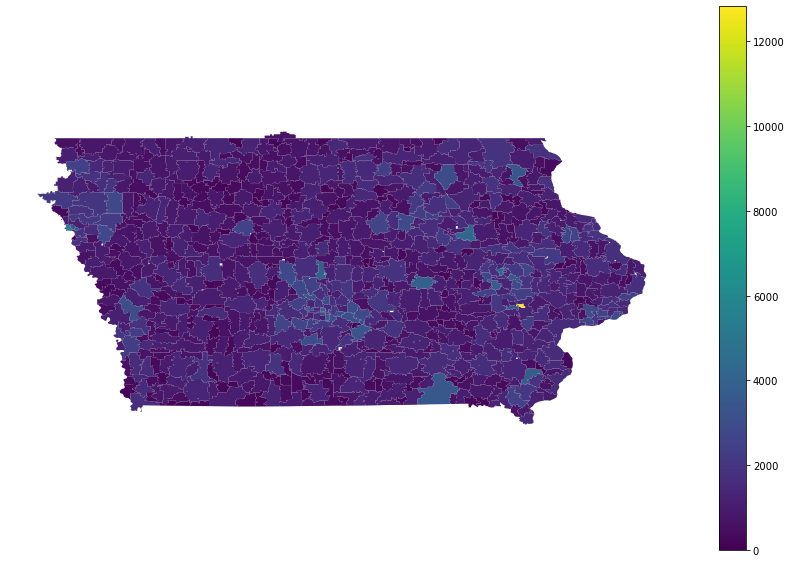

In [37]:
# population_per_store_imputed 
ax = iowa_pop_gdf.plot(column='population_per_store_imputed',legend = True, figsize=(15, 10))                       
ax.set_axis_off(); # turns off axis labels

population 25_to_34_years

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


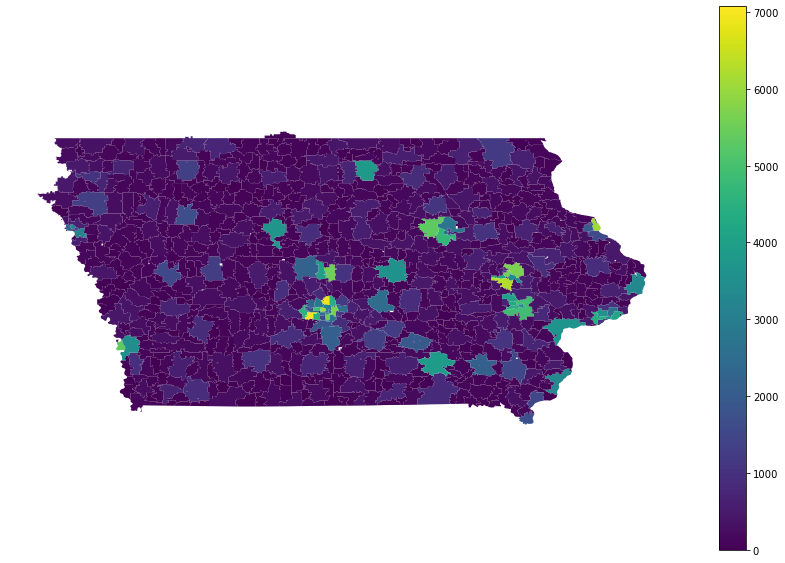

In [38]:

ax = iowa_pop_gdf.plot(column='25_to_34_years',legend = True, figsize=(15, 10), 
                        )
                      
ax.set_axis_off(); # turns off axis labels

Median Income

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


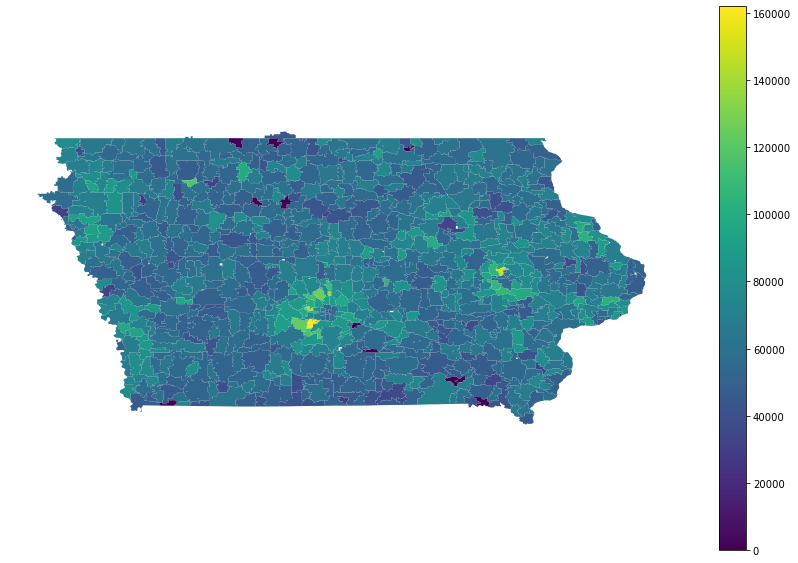

In [39]:


ax = iowa_pop_gdf.plot(column='Median_household_income_(dollars)',legend = True, figsize=(15, 10), 
                        )
                      
ax.set_axis_off(); # turns off axis labels

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


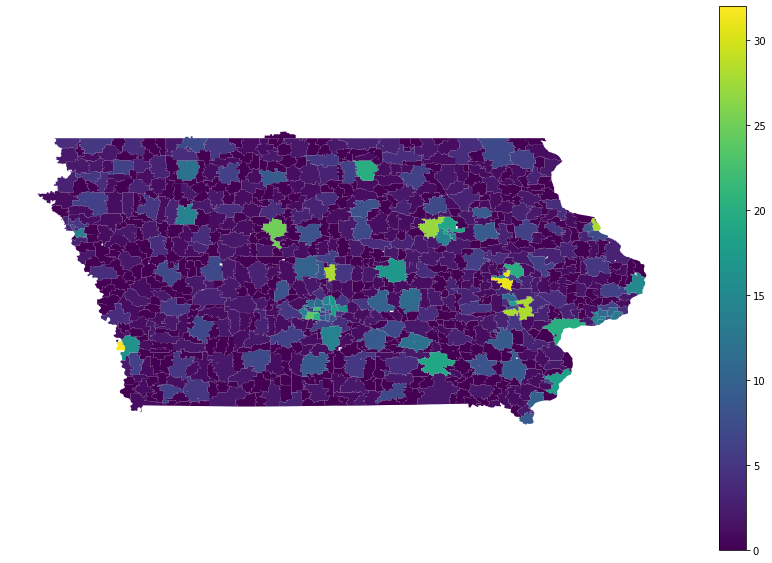

In [40]:
# number_of_stores                   
ax = iowa_pop_gdf.plot(column='number_of_stores',legend = True, figsize=(15, 10), 
                        )
                      
ax.set_axis_off(); # turns off axis labels

In [41]:
# cmap='RdBu',center=0,annot=True
# from mpl_toolkits.axes_grid1 import make_axes_locatable

# fig, ax = plt.subplots(1, 1)
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.1)

# mapit = iowa_pop_gdf.plot(column='population_per_zip', ax=ax, legend = True, cax=cax, figsize=(15, 10),
#                       legend_kwds={'label': "Iowa Population by Zip Code",
#                          }) #'orientation': "horizontal"
# mapit.set_axis_off(); # turns off axis labels

In [42]:
# ax = iowa_pop_stores_gdf.plot(column='Store_Number',legend = True, figsize=(15, 10))
# ax.set_axis_off(); # turns off axis labels

In [44]:
# loc_gdf = gpd.GeoDataFrame(d, crs=iowa_pop_gdf.crs)
# type(loc_gdf)
# loc_gdf

In [ ]:
loc_gdf.plot(marker='*', markersize=5);
# locations_gpd.to_crs(iowa_pop_gdf)

In [ ]:
# iowa.head(3)
# iowa.info()